#1. Get RGB values of a pixel

In [ ]:
image=Image.open('/gdrive/My Drive/image.jpg')
# image=face_recognition.load_image_file('/gdrive/My Drive/image.jpg')

for face_landmarks in face_landmarks_list:
  print((face_landmarks['nose_tip'][0]))
  colors1=image.getpixel(face_landmarks['nose_tip'][0])
  colors2=image.getpixel(face_landmarks['bottom_lip'][0])
  print("nose tip color:", colors1)
  print("bottom lip color:", colors2)

In [ ]:
def get_average_color(x, y, n, image):
    """ Returns a 3-tuple containing the RGB value of the average color of the
    given square bounded area of length = n whose origin (top left corner) 
    is (x, y) in the given image"""

    r, g, b = 0, 0, 0
    count = 0
    for s in range(x, x+n+1):
        for t in range(y, y+n+1):
            pixlr, pixlg, pixlb = image.getpixel((x, y))
            r += pixlr
            g += pixlg
            b += pixlb
            count += 1
    return ((r/count), (g/count), (b/count))



In [ ]:
def get_average_color_all_points(landmark,image):
    r,g,b = 0,0,0
    for i in range(len(landmark)):
        avgr, avgg, avgb = get_average_color(landmark[i][0],landmark[i][1],10,image)
        r += avgr
        g += avgg
        b += avgb
    return r/len(landmark),g/len(landmark),b/len(landmark)

# r1, g1, b1 = get_average_color_all_points(face_landmarks['nose_tip'], image)
# print("nose tip average color:", r1, g1, b1)

# r2, g2, b2 = get_average_color_all_points(face_landmarks['bottom_lip'], image)
# print("bottom lip average color:", r2, g2, b2)

def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

# print(face_landmarks['nose_tip'])
# print(rgb_to_hex(r1,g1,b1))

In [ ]:
plt.plot([1, 2, 3, 4], [2.0, 2.5, 3.3, 4.5], color = rgb_to_hex(r1,g1,b1) )
plt.plot([2, 3, 4, 5], [2.0, 2.5, 3.3, 4.5], color = rgb_to_hex(r2,g2,b2) )

# Make train data for regression

In [ ]:
import pandas as pd

In [ ]:
tr_incor_root = '/gdrive/My Drive/dataset/train/incorrect/'

all_rgb_colors = {}
all_images = []
for i in range(4000):
    if (i % 500 == 0):
        print(i)
    try:
        img_string = "%05d_Mask_Mouth_Chin.jpg" % i
        # tr_incor_path = Path(tr_incor_root) / img_string
        img_string = tr_incor_root + img_string
        image=face_recognition.load_image_file(img_string)
    except:
        try:
            img_string = "%05d_Mask_Chin.jpg" % i
            # tr_incor_path = Path(tr_incor_root) / img_string
            img_string = tr_incor_root + img_string
            image=face_recognition.load_image_file(img_string)
        except:
            continue

    face_landmarks_list = face_recognition.face_landmarks(image)
    if len(face_landmarks_list)==0:
        continue
    face_landmarks = face_landmarks_list[0]

    new_image=Image.open(img_string)
    color_landmarks = []
    color_landmarks += list(get_average_color_all_points(face_landmarks['nose_tip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['top_lip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['bottom_lip'], new_image))

    all_rgb_colors["%05d"%i] = color_landmarks
    all_images.append(image)
    # print(face_landmarks)

In [ ]:
for i in range(4000, 8000):
    if (i % 500 == 0):
        print(i)
    try:
        img_string = "%05d_Mask_Mouth_Chin.jpg" % i
        # tr_incor_path = Path(tr_incor_root) / img_string
        img_string = tr_incor_root + img_string
        image=face_recognition.load_image_file(img_string)
    except:
        try:
            img_string = "%05d_Mask_Chin.jpg" % i
            # tr_incor_path = Path(tr_incor_root) / img_string
            img_string = tr_incor_root + img_string
            image=face_recognition.load_image_file(img_string)
        except:
            continue

    face_landmarks_list = face_recognition.face_landmarks(image)
    if len(face_landmarks_list)==0:
        continue
    face_landmarks = face_landmarks_list[0]

    new_image=Image.open(img_string)
    color_landmarks = []
    color_landmarks += list(get_average_color_all_points(face_landmarks['nose_tip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['top_lip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['bottom_lip'], new_image))

    all_rgb_colors["%05d"%i] = color_landmarks
    all_images.append(image)
    # print(face_landmarks)
tr_incor_detections_df = pd.DataFrame(all_rgb_colors)
tr_incor_detections_df.to_csv("tr_incor.csv")

In [ ]:
tr_incor_root = '/gdrive/My Drive/dataset/train/correct/'

all_rgb_colors = {}
all_images = []
for i in range(1000):
    if (i % 50 == 0):
        print(i)
    try:
        img_string = "%05d_Mask.jpg" % i
        # tr_incor_path = Path(tr_incor_root) / img_string
        img_string = tr_incor_root + img_string
        image=face_recognition.load_image_file(img_string)
    except:
        continue

    face_landmarks_list = face_recognition.face_landmarks(image)
    if len(face_landmarks_list)==0:
        continue
    face_landmarks = face_landmarks_list[0]

    new_image=Image.open(img_string)
    color_landmarks = []
    color_landmarks += list(get_average_color_all_points(face_landmarks['nose_tip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['top_lip'], new_image))
    color_landmarks += list(get_average_color_all_points(face_landmarks['bottom_lip'], new_image))

    all_rgb_colors["%05d"%i] = color_landmarks
    all_images.append(image)
    # print(face_landmarks)

tr_incor_detections_df = pd.DataFrame(all_rgb_colors)
tr_incor_detections_df.to_csv("tr_cor.csv")

In [ ]:
def classify_mask_corr(model,img_string):
    try:
        new_image=Image.open(img_string)
        image = np.array(new_image)
        # image=face_recognition.load_image_file(img_string)
    except:
        return "can not open image"
    face_landmarks_list = face_recognition.face_landmarks(image)
    if len(face_landmarks_list)==0:
        return "can not find landmarks"

    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")
    
    for face_landmarks in face_landmarks_list:
        
        for face_location in face_locations:
            top, right, bottom, left = face_location
            # print(top, right, bottom, left)
            # print(face_landmarks['nose_bridge'][0])
            if face_landmarks['nose_bridge'][0][0] <= right and face_landmarks['nose_bridge'][0][0] >= left and face_landmarks['nose_bridge'][0][1] <= bottom and face_landmarks['nose_bridge'][0][1] >= top:
                plt.imshow(image[top:bottom, left:right])
                plt.axis('off')
                plt.show()

        # print(face_landmarks)

        color_landmarks = []
        color_landmarks += list(get_average_color_all_points(face_landmarks['nose_tip'], new_image))
        color_landmarks += list(get_average_color_all_points(face_landmarks['top_lip'], new_image))
        color_landmarks += list(get_average_color_all_points(face_landmarks['bottom_lip'], new_image))

        rgb_tensor = torch.tensor(color_landmarks)
        pred = model(rgb_tensor)

        print(pred)
        print(type(image))
        print(type(new_image))
        if pred < 0.4:
            # return 0
            print(0)
        else:
            # return 1
            print(1)

In [ ]:
class Linear_Model(nn.Module):
    def __init__(self,num_input):
        super(Linear_Model,self).__init__()

        self.inputNum = num_input
        self.fc = nn.Linear(num_input,1)
    
    def forward(self,x):
        return self.fc(x)


# Test for regression


In [ ]:
model_path = root + "/mask_correctness.pt"
new_model = torch.load(model_path)
new_model.eval()

Linear_Model(
  (fc): Linear(in_features=9, out_features=1, bias=True)
)

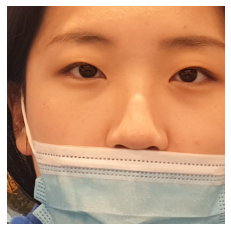

tensor([-0.4727], grad_fn=<AddBackward0>)
<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
0
None


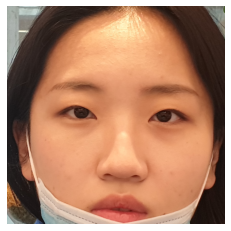

tensor([-0.3221], grad_fn=<AddBackward0>)
<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
0
None


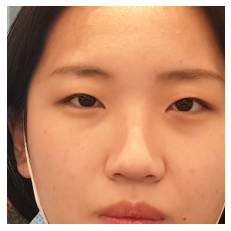

tensor([-0.0985], grad_fn=<AddBackward0>)
<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
0
None


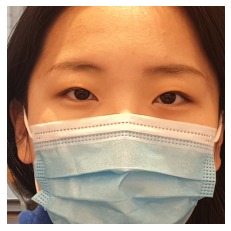

tensor([-0.0359], grad_fn=<AddBackward0>)
<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
0
None


In [ ]:
img_string = root + "/js_mask_incor1.jpg"
print(classify_mask_corr(new_model,img_string))

img_string = root + "/js_mask_incor2.jpg"
print(classify_mask_corr(new_model,img_string))

img_string = root + "/js_mask_incor3.jpg"
print(classify_mask_corr(new_model,img_string))

img_string = root + "/js_mask_cor1.jpg"
print(classify_mask_corr(new_model,img_string))